# Valuacion Opciones Asiaticas

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [193]:
ticker = "CL=F" #Crude Oil

data = yf.download(ticker, start="2022-01-01", end="2025-10-15", progress=False, auto_adjust=True)["Close"]

S0 = data.iloc[-1]

S0

Ticker
CL=F    58.700001
Name: 2025-10-14 00:00:00, dtype: float64

In [194]:
returns = data.pct_change().dropna()
sigma = returns.std() * np.sqrt(252)
T = 1
K = 65
num_steps = 252
r = 0.0425
n_sims = 10000
dt = T / num_steps
Z = np.random.normal(size=(n_sims, num_steps))

In [195]:
# underlying asset = activo subyacente
def simulate_price(S0, r, sigma, T, num_steps, n_sims):
    dt = T / num_steps
    Z = np.random.normal(size=(n_sims, num_steps)) # Parametros estandar: 0 y 1
    simulated_returns = (r - 0.5 * sigma.iloc[0]**2) * dt + sigma.iloc[0] * np.sqrt(dt) * Z
    simulated_cumulative_returns = np.cumsum(simulated_returns, axis = 1)
    simulated_prices = S0.iloc[0] * np.exp(simulated_cumulative_returns)
    return simulated_prices


def get_price_fixed_strike_average_price(simulated_prices, K, r, T, option_type):
    avg_prices = np.mean(simulated_prices[:, 1:], axis = 1)

    if option_type == "call":
        payoffs = np.maximum(avg_prices - K, 0)
    elif option_type == "put":
        payoffs = np.maximum(K - avg_prices, 0)

    option_price = np.exp(-r * T) * np.mean(payoffs)

    return option_price

In [196]:
simulated_prices = simulate_price(S0, r, sigma, T, num_steps, n_sims)

get_price_fixed_strike_average_price(simulated_prices, K, r, T, "call")

3.3063663599590143

In [197]:

get_price_fixed_strike_average_price(simulated_prices, K, r, T, "put")

7.829372513174735

# Actividad

### 1. Completa las funciones:

In [200]:
ST = simulated_prices[:,-1]

In [201]:
def get_price__floating_strike__average_price(simulated_prices, ST, r, T, option_type):
    avg_prices = np.mean(simulated_prices[:, 1:], axis=1)  

    if option_type == "call":
        payoffs = np.maximum(ST - avg_prices, 0)
    elif option_type == "put":
        payoffs = np.maximum(avg_prices - ST, 0)

    option_price = np.exp(-r * T) * np.mean(payoffs)

    return option_price


In [202]:


get_price__floating_strike__average_price(simulated_prices, ST, r, T, "call")

5.602131931422685

In [203]:


get_price__floating_strike__average_price(simulated_prices, ST, r, T, "put")

4.226818197232378

In [204]:
def get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, option_type):
    log_prices = np.log(simulated_prices[:, 1:])
    geo_avg = np.exp(np.mean(log_prices, axis=1))

    if option_type == "call":
        payoffs = np.maximum(geo_avg - K, 0)
    elif option_type == "put":
        payoffs = np.maximum(K - geo_avg, 0)

    option_price = np.exp(-r * T) * np.mean(payoffs)
    return option_price

In [205]:


get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, "call")

2.9863439874819435

In [206]:


get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, "put")

8.168905800937349

In [207]:
def get_price__floating_strike__geometric_price(simulated_prices, ST, r, T, option_type):
    log_prices = np.log(simulated_prices[:, 1:])
    geo_avg = np.exp(np.mean(log_prices, axis=1))

    if option_type == "call":
        payoffs = np.maximum(ST - geo_avg, 0)
    elif option_type == "put":
        payoffs = np.maximum(geo_avg - ST, 0)

    option_price = np.exp(-r * T) * np.mean(payoffs)
    return option_price

In [208]:


get_price__floating_strike__geometric_price(simulated_prices, ST, r, T, "call")

5.962906191914696

In [209]:

get_price__floating_strike__geometric_price(simulated_prices, ST, r, T, "put")

3.9280367974847064

In [210]:
def get_price__european(simulated_prices, ST, K, r, T, option_type):
    if option_type == "call":
        payoffs = np.maximum(ST - K, 0)
    elif option_type == "put":
        payoffs = np.maximum(K - ST, 0)

    option_price = np.exp(-r * T) * np.mean(payoffs)
    return option_price

In [211]:

get_price__european(simulated_prices, ST, K, r, T, "call")

7.432260046879071

In [212]:

get_price__european(simulated_prices, ST, K, r, T, "put")

10.579952465904483

**2. Compara los precios de las primas para una opción europea, opción asiática Fixed Strike con media aritmética y  opción asiática Fixed Strike con media geométrica.**
> - Grafica en el eje Y el precio de la prima y en X diferentes precios Strike. Observa los precios
> - ¿Cuáles son las más baratas y las más caras?
> - ¿Las más baratas sigue siendo la más baratas sin importar si es una opcion call o put?
> - Piensa por qué son estos resultados e interpreta lo que ves 

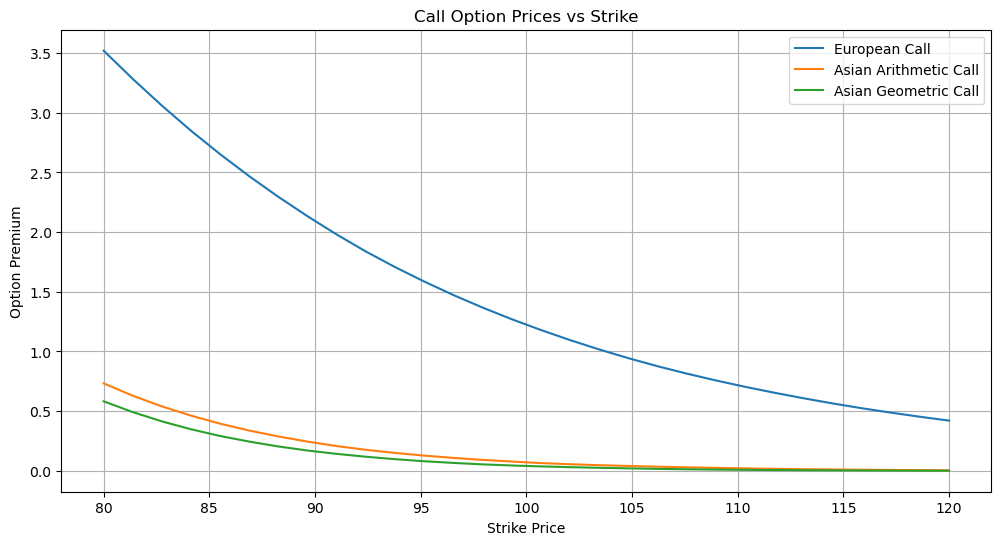

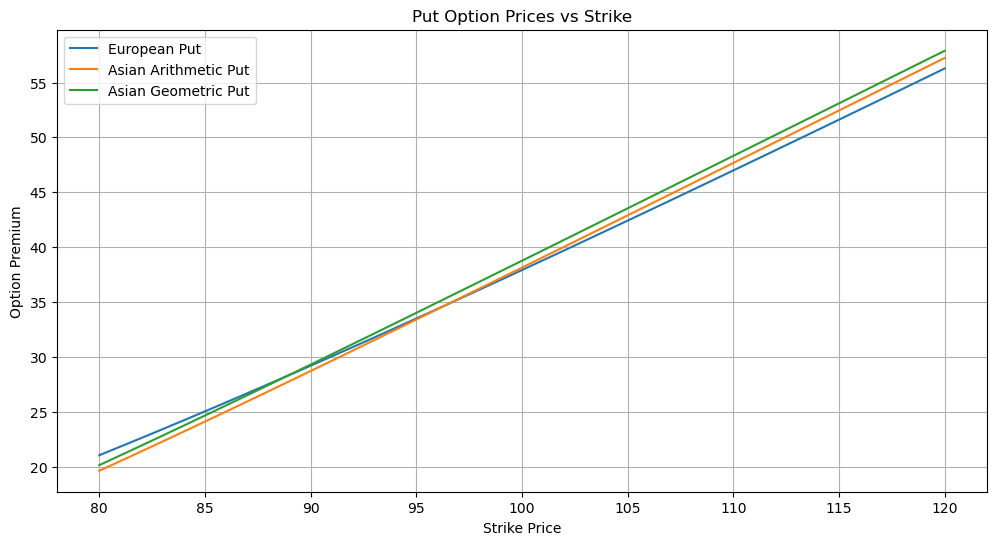

In [214]:
strike_range = np.linspace(80, 120, 30)

# Guardar precios
prices_call = {
    "European": [],
    "Asian Arithmetic": [],
    "Asian Geometric": []
}
prices_put = {
    "European": [],
    "Asian Arithmetic": [],
    "Asian Geometric": []
}

# Calcular primas para CALLs y PUTs
for K in strike_range:
    prices_call["European"].append(get_price__european(simulated_prices, ST, K, r, T, "call"))
    prices_call["Asian Arithmetic"].append(get_price_fixed_strike_average_price(simulated_prices, K, r, T, "call"))
    prices_call["Asian Geometric"].append(get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, "call"))

    prices_put["European"].append(get_price__european(simulated_prices, ST, K, r, T, "put"))
    prices_put["Asian Arithmetic"].append(get_price_fixed_strike_average_price(simulated_prices, K, r, T, "put"))
    prices_put["Asian Geometric"].append(get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, "put"))

# Graficar CALLs
plt.figure(figsize=(12, 6))
plt.plot(strike_range, prices_call["European"], label="European Call")
plt.plot(strike_range, prices_call["Asian Arithmetic"], label="Asian Arithmetic Call")
plt.plot(strike_range, prices_call["Asian Geometric"], label="Asian Geometric Call")
plt.title("Call Option Prices vs Strike")
plt.xlabel("Strike Price")
plt.ylabel("Option Premium")
plt.legend()
plt.grid(True)
plt.show()

# Graficar PUTs
plt.figure(figsize=(12, 6))
plt.plot(strike_range, prices_put["European"], label="European Put")
plt.plot(strike_range, prices_put["Asian Arithmetic"], label="Asian Arithmetic Put")
plt.plot(strike_range, prices_put["Asian Geometric"], label="Asian Geometric Put")
plt.title("Put Option Prices vs Strike")
plt.xlabel("Strike Price")
plt.ylabel("Option Premium")
plt.legend()
plt.grid(True)
plt.show()

Al comparar las primas de opciones europeas y asiáticas tanto con promedio aritmético como geométrico, vemos que las europeas suelen ser más caras para calls, pero más baratas para puts. Esto se debe a que las opciones asiáticas, al basarse en promedios, suavizan la variabilidad del precio del activo subyacente, lo que reduce el riesgo y, por tanto, el valor de la opción. Además, como la media geométrica es siempre menor que la aritmética, las opciones asiáticas con promedio geométrico tienden a ser las más baratas en calls, pero curiosamente las más caras en puts.

En conclusión la opción más barata no es siempre la misma, depende de si es call o put y del tipo de promedio utilizado.

**3. Usando simulated prices, obtén el ST promedio.  Con ese ST, calcula los precios de las opciones Floating Strike. Compara los precios vs las Fixed Strike y la europea.**
> - ¿Cuáles son las más baratas y las más caras?
> - ¿Las más baratas sigue siendo la más baratas sin importar si es una opcion call o put?
> - Piensa por qué son estos resultados e interpreta lo que ves 

In [217]:
ticker = "CL=F" #Crude Oil

data = yf.download(ticker, start="2022-01-01", end="2025-10-15", progress=False, auto_adjust=True)["Close"]

S0 = data.iloc[-1]

S0

Ticker
CL=F    58.700001
Name: 2025-10-14 00:00:00, dtype: float64

In [218]:
returns = data.pct_change().dropna()
sigma = returns.std() * np.sqrt(252)
T = 1
K = 65
num_steps = 252
r = 0.0425
n_sims = 10000
dt = T / num_steps
Z = np.random.normal(size=(n_sims, num_steps))

In [219]:
ST = simulated_prices[:,-1]

In [220]:
results = pd.DataFrame({
    "Opción": [
        "Floating Strike - Arithmetic Avg", 
        "Fixed Strike - Arithmetic Avg", 
        "Floating Strike - Geometric Avg", 
        "Fixed Strike - Geometric Avg",
        "Europea"
    ],
    "Call": [
        get_price__floating_strike__average_price(simulated_prices, ST, r, T, "call"),
        get_price_fixed_strike_average_price(simulated_prices, K, r, T, "call"),
        get_price__floating_strike__geometric_price(simulated_prices, ST, r, T, "call"),
        get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, "call"),
        get_price__european(simulated_prices, ST, K, r, T, "call")
    ],
    "Put": [
        get_price__floating_strike__average_price(simulated_prices, ST, r, T, "put"),
        get_price_fixed_strike_average_price(simulated_prices, K, r, T, "put"),
        get_price__floating_strike__geometric_price(simulated_prices, ST, r, T, "put"),
        get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, "put"),
        get_price__european(simulated_prices, ST, K, r, T, "put")
    ]
})


results.head()

,Opción,Call,Put
0,Floating Strike - Arithmetic Avg,5.602132,4.226818
1,Fixed Strike - Arithmetic Avg,3.306366,7.829373
2,Floating Strike - Geometric Avg,5.962906,3.928037
3,Fixed Strike - Geometric Avg,2.986344,8.168906
4,Europea,7.432260,10.579952


En los resultados obtenidos, se observa que las opciones europeas son las más caras tanto para calls como para puts, ya que capturan completamente el valor al vencimiento sin promediar precios intermedios. En el caso de las opciones call, las más baratas son las de strike fijo, dado que el precio inicial del activo (S₀) está por debajo del strike (K = 65), lo que reduce significativamente la probabilidad de que terminen in-the-money. En cambio, para las puts, las más baratas son las de strike flotante, ya que al ajustarse al precio promedio del activo, se reduce su valor esperado. Esto muestra que la opción más barata no es siempre la misma y depende del tipo de opción (call o put) y de cómo se define el strike y el promedio utilizado.